In [1]:
from WaveAutoEncoder2_model import WaveAutoEncoder
from WaveAutoEncoder2_data import ToData
import config
import torch
import pytorch_lightning as pl
from DatasetLib import Dataset_onMemory
import matplotlib.pyplot as plt
from torch.utils import data as DataUtil

In [4]:
data_set = Dataset_onMemory(ToData.filepath,ToData.data_name,using_length=16,log=True)


loaded: data, shape: (16, 1, 20800)


In [5]:
model = WaveAutoEncoder()
batch_size = 16
EPOCHS = 500
data_loader = DataUtil.DataLoader(data_set,batch_size,shuffle=True,num_workers=0,pin_memory=False)

In [4]:
trainer = pl.Trainer(gpus=1,num_nodes=1,precision=16,max_epochs=EPOCHS)
trainer.fit(model,data_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type        | Params
------------------------------------------
0 | criterion | MSELoss     | 0     
1 | encoder   | WaveEncoder | 1.1 M 
2 | decoder   | WaveDecoder | 1.5 M 
------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
10.079    Total estimated model params size (MB)
C:\Users\22shi\anaconda3\envs\JARVIS\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 499: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s, loss=0.0028, v_num=33]


In [5]:
from datetime import datetime
now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
nameE = f'params/WaveEncoder2_{now}.params'
nameD = f'params/WaveDecoder2_{now}.params'
name = f'params/WaveAutoEncoder2_{now}.params'
torch.save(model.encoder.state_dict(),nameE)
torch.save(model.decoder.state_dict(),nameD)
torch.save(model.state_dict(),name)
print('saved')

saved


In [6]:
#model.load_state_dict(torch.load('params/WaveAutoEncoder2_2021-07-18_07-13-48.params'))

<All keys matched successfully>

In [7]:
viewlen = 16
with torch.no_grad():
    model.eval()
    model.cuda()
    model.half()
    data = data_set.data[0][:viewlen].cuda()
    out = model(data).cpu().detach().float().numpy()
    data = data.detach().cpu().float().numpy()

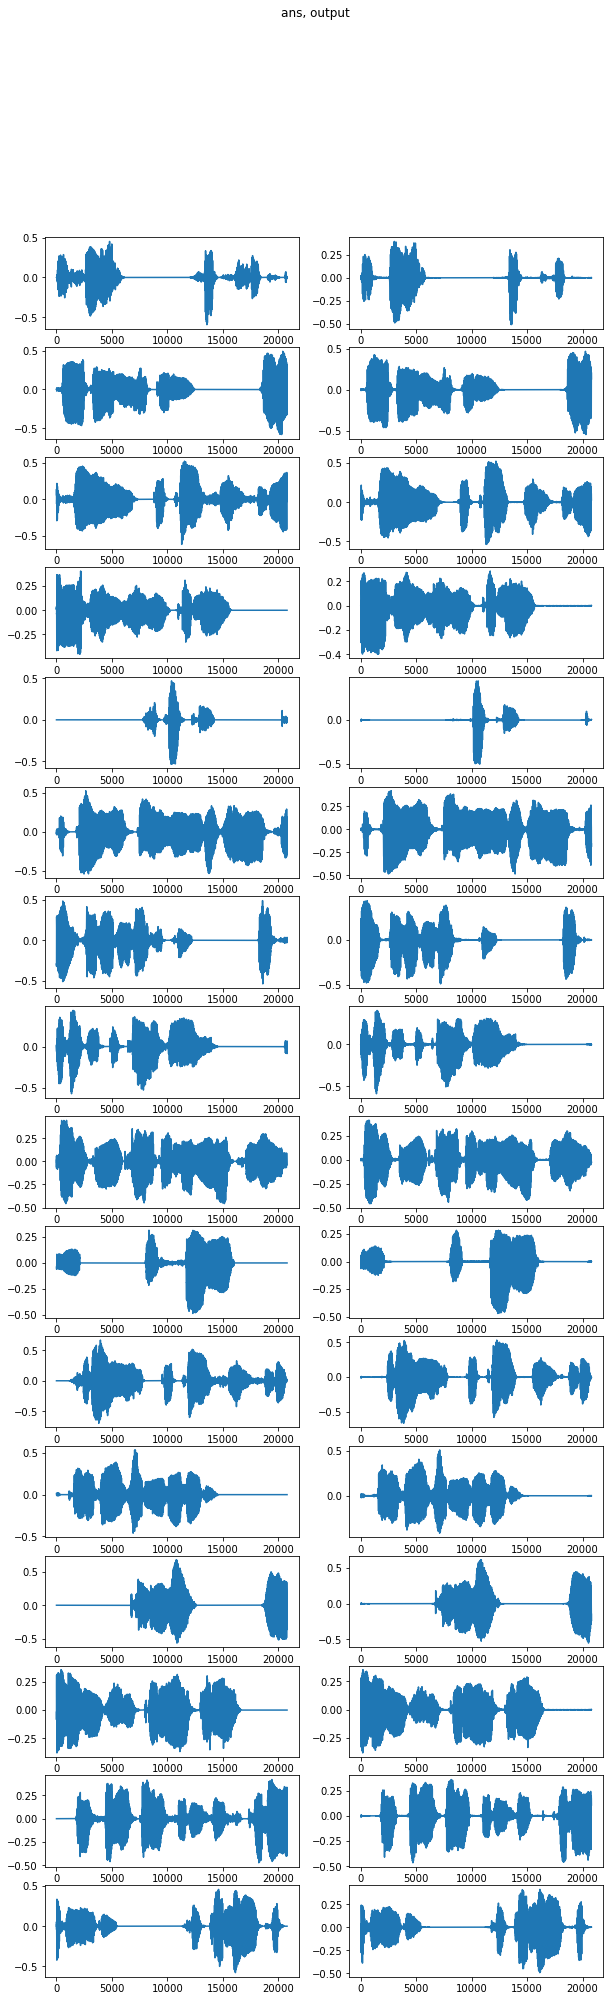

In [18]:
l = len(data)
fig,ax = plt.subplots(l,2,figsize=(10,l*2))
fig.suptitle('ans, output')
for i in range(l):
    ax[i,0].plot(data[i].reshape(-1))
    ax[i,1].plot(out[i].reshape(-1))

In [20]:
import sounddevice as sd
sd.play(out[1].reshape(-1),config.frame_rate)

In [25]:
from scipy.io import wavfile
name = 'results/WaveAutoEncoder2_2021-07-18_07-13-48/waves/{}.wav'
for i in range(len(data)):
    an = name.format(f'ans{i}')
    on = name.format(f'out{i}')
    wavfile.write(an,config.frame_rate,data[i].reshape(-1))
    wavfile.write(on,config.frame_rate,out[i].reshape(-1))